# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import seaborn as sns
import numpy as np

pd.set_option('display.float_format', lambda x:f"{x:,.2f}")

In [2]:
sns.set_context('notebook', font_scale=0.9)
plt.style.use(['ggplot'])

# Load the Data

In [3]:
df = pd.read_excel('Data/london_weather_MODIFIED.xlsx')
df.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1,19790102,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
2,19790103,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
3,19790104,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
4,19790105,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


# Convert the Date Column to Datetime Dtype.

In [5]:
%%time
df['datetime'] = pd.to_datetime(df['date'], format = '%Y%m%d')
##Examine the results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15341 non-null  int64         
 1   cloud_cover       14938 non-null  float64       
 2   sunshine          14957 non-null  float64       
 3   global_radiation  14939 non-null  float64       
 4   max_temp          14951 non-null  float64       
 5   mean_temp         14922 non-null  float64       
 6   min_temp          14955 non-null  float64       
 7   precipitation     14951 non-null  float64       
 8   pressure          14953 non-null  float64       
 9   snow_depth        13589 non-null  float64       
 10  datetime          15341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1)
memory usage: 1.3 MB
CPU times: total: 0 ns
Wall time: 16.7 ms


In [6]:
# drop duplicate column
df = df.drop(columns='date')
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,datetime
0,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00,1979-01-01
1,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00,1979-01-02
2,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00,1979-01-03
3,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00,1979-01-04
4,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00,1979-01-05


# Set Datetime as Index

In [7]:
# Setting the datetime as the index
df = df.set_index('datetime')
# Examine the results
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', length=15341, freq=None)

In [8]:
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
1979-01-01,2.00,7.00,52.00,2.30,-4.10,-7.50,0.40,"101,900.00",9.00
1979-01-02,6.00,1.70,27.00,1.60,-2.60,-7.50,0.00,"102,530.00",8.00
1979-01-03,5.00,0.00,13.00,1.30,-2.80,-7.20,0.00,"102,050.00",4.00
1979-01-04,8.00,0.00,13.00,-0.30,-2.60,-6.50,0.00,"100,840.00",2.00
1979-01-05,6.00,2.00,29.00,5.60,-0.80,-1.40,0.00,"102,250.00",1.00
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.00,0.90,32.00,7.50,7.50,7.60,2.00,"98,000.00",NaN
2020-12-28,7.00,3.70,38.00,3.60,1.10,-1.30,0.20,"97,370.00",NaN
2020-12-29,7.00,0.00,21.00,4.10,2.60,1.10,0.00,"98,830.00",NaN


# Filter out only the required data

- Keep only data from the year 2000 or later.
- Keep only the following features:
    - precipitation
    - mean_temp
    - min_temp
    - max_temp
    - snow_depth

In [9]:
# Keeping only data from the year 2000 or later
df = df.loc['2000':]
df.head()

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
datetime,,,,,,,,,
2000-01-01,7.00,0.40,18.00,10.80,7.00,4.90,0.00,"102,450.00",0.00
2000-01-02,7.00,0.70,20.00,11.50,7.90,5.00,0.20,"102,530.00",0.00
2000-01-03,8.00,0.00,13.00,9.50,9.40,7.20,6.00,"101,860.00",0.00
2000-01-04,5.00,2.90,34.00,11.00,7.00,4.40,0.20,"101,480.00",0.00
2000-01-05,5.00,1.30,25.00,10.80,6.40,1.90,0.80,"101,420.00",0.00


In [10]:
df.index.strftime('%Y').value_counts()

2000    366
2008    366
2016    366
2012    366
2020    366
2004    366
2005    365
2006    365
2007    365
2009    365
2001    365
2011    365
2003    365
2013    365
2014    365
2015    365
2002    365
2017    365
2018    365
2019    365
2010    365
Name: datetime, dtype: int64

In [11]:
# keep only precipitation, mean_temp, min_temp, max_temp, snow_depth features
df = df[['precipitation', 'mean_temp', 'min_temp', 'max_temp', 'snow_depth']]
df.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-01,0.00,7.00,4.90,10.80,0.00
2000-01-02,0.20,7.90,5.00,11.50,0.00
2000-01-03,6.00,9.40,7.20,9.50,0.00
2000-01-04,0.20,7.00,4.40,11.00,0.00
2000-01-05,0.80,6.40,1.90,10.80,0.00


# Resampling and Imputing missing values

In [12]:
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

In [13]:
((df.isna().sum() / len(df)) * 100).round(2)

precipitation    5.08
mean_temp        5.46
min_temp         5.03
max_temp         5.08
snow_depth      22.84
dtype: float64

## Resampling

In [15]:
agg_dict = {'precipitation': 'sum', 'mean_temp': 'mean'}

df_month = df.copy()
df_month = df.resample('M').agg(agg_dict['precipitation'])
df_month

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-31,14.30,159.50,78.30,236.60,0.00
2000-02-29,62.20,200.90,110.00,288.00,0.00
2000-03-31,13.40,254.60,147.00,366.20,0.00
2000-04-30,71.80,256.10,149.90,373.50,0.00
2000-05-31,68.40,402.40,278.90,520.20,0.00
...,...,...,...,...,...
2020-08-31,45.20,578.10,463.80,712.60,0.00
2020-09-30,19.20,479.60,334.80,625.60,0.00
2020-10-31,143.40,331.50,257.90,418.30,0.00


In [16]:
df_year = df.copy()
df_year = df.resample('A').agg(agg_dict['mean_temp'])
df_year

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-12-31,2.11,11.53,7.97,15.11,0.01
2001-12-31,1.95,11.31,7.64,14.97,0.00
2002-12-31,2.15,12.01,8.35,15.73,0.00
2003-12-31,1.31,12.23,7.99,16.49,0.03
2004-12-31,1.71,11.87,8.21,15.51,0.01
2005-12-31,1.22,11.88,8.03,15.73,0.01
2006-12-31,1.74,12.39,8.52,16.17,0.00
2007-12-31,1.88,12.06,8.22,15.94,0.03
2008-12-31,1.76,11.17,7.45,15.03,0.02


In [17]:
df_year = df_year.interpolate()
df_year.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# Answer the Questions with Visualizations

## Q1: What month had the most precipitation between 2000 through 2010?

In [18]:
df_month = df_month.loc['2000':'2010']
df_month.index

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-30',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-30', '2000-10-31',
               ...
               '2010-03-31', '2010-04-30', '2010-05-31', '2010-06-30',
               '2010-07-31', '2010-08-31', '2010-09-30', '2010-10-31',
               '2010-11-30', '2010-12-31'],
              dtype='datetime64[ns]', name='datetime', length=132, freq='M')

In [19]:
df_month

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-01-31,14.30,159.50,78.30,236.60,0.00
2000-02-29,62.20,200.90,110.00,288.00,0.00
2000-03-31,13.40,254.60,147.00,366.20,0.00
2000-04-30,71.80,256.10,149.90,373.50,0.00
2000-05-31,68.40,402.40,278.90,520.20,0.00
...,...,...,...,...,...
2010-08-31,83.80,495.60,379.40,607.60,0.00
2010-09-30,38.00,436.20,319.30,546.80,0.00
2010-10-31,61.00,342.10,244.30,436.90,0.00


In [20]:
df_month.loc[df_month['precipitation'].idxmax()]

precipitation   138.40
mean_temp       288.10
min_temp        214.10
max_temp        356.10
snow_depth        0.00
Name: 2009-11-30 00:00:00, dtype: float64

In [21]:
precipitation, mean_temp, min_temp, max_temp, snow_depth = df_month.loc[df_month['precipitation'].idxmax()]

In [22]:
date = df_month.loc[df_month['precipitation'].idxmax()].name.date()
print(date)

2009-11-30


In [23]:
print(f'The date of highest precipitation is: {date}')
print(f'The Precipitation was: {precipitation}')

The date of highest precipitation is: 2009-11-30
The Precipitation was: 138.4


### Visualization

In [24]:
ts_2010 = df_month['precipitation']
ts_2010

datetime
2000-01-31   14.30
2000-02-29   62.20
2000-03-31   13.40
2000-04-30   71.80
2000-05-31   68.40
              ... 
2010-08-31   83.80
2010-09-30   38.00
2010-10-31   61.00
2010-11-30   22.00
2010-12-31   21.20
Freq: M, Name: precipitation, Length: 132, dtype: float64

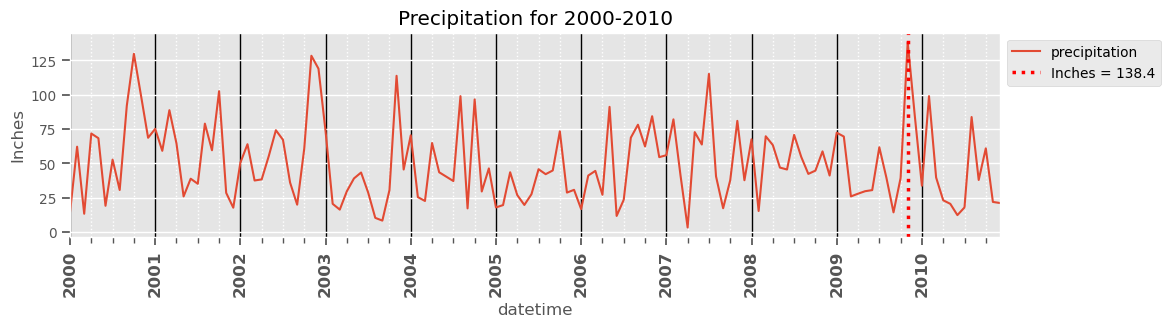

In [25]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,3))
ax.set_title('Precipitation for 2000-2010')

ts_2010.plot(style='-')


## Change the font of the major ticks to stand out
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), 
                   fontsize='large', 
                   fontweight='bold') 


## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

## rotate the dates
fig.autofmt_xdate(which='major',rotation=90,ha='center')

ax.axvline(date ,color='red',lw=2.5, ls=':', label=f'Inches = {precipitation}')

plt.ylabel('Inches')

ax.legend(bbox_to_anchor=[1,1]);

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [26]:
df_year.index

DatetimeIndex(['2000-12-31', '2001-12-31', '2002-12-31', '2003-12-31',
               '2004-12-31', '2005-12-31', '2006-12-31', '2007-12-31',
               '2008-12-31', '2009-12-31', '2010-12-31', '2011-12-31',
               '2012-12-31', '2013-12-31', '2014-12-31', '2015-12-31',
               '2016-12-31', '2017-12-31', '2018-12-31', '2019-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', name='datetime', freq='A-DEC')

In [27]:
df_year.head()

,precipitation,mean_temp,min_temp,max_temp,snow_depth
datetime,,,,,
2000-12-31,2.11,11.53,7.97,15.11,0.01
2001-12-31,1.95,11.31,7.64,14.97,0.00
2002-12-31,2.15,12.01,8.35,15.73,0.00
2003-12-31,1.31,12.23,7.99,16.49,0.03
2004-12-31,1.71,11.87,8.21,15.51,0.01


In [28]:
df_year.loc[df_year['mean_temp'].idxmin()]

precipitation    1.38
mean_temp       10.65
min_temp         6.76
max_temp        14.49
snow_depth       0.29
Name: 2010-12-31 00:00:00, dtype: float64

In [29]:
precipitation2, mean_temp2, min_temp2, max_temp2, snow_depth2 = df_year.loc[df_year['mean_temp'].idxmin()].round(2)

In [30]:
date2 = df_year.loc[df_year['mean_temp'].idxmin()].name.date()
print(date2)

2010-12-31


In [31]:
print(f'The date with the lowest temperature was: {date2}')
print(f'The temperature was: {mean_temp2}')

The date with the lowest temperature was: 2010-12-31
The temperature was: 10.65


## Visualization

In [32]:
ts_2020 = df_year['mean_temp'].round(2)
ts_2020

datetime
2000-12-31   11.53
2001-12-31   11.31
2002-12-31   12.01
2003-12-31   12.23
2004-12-31   11.87
2005-12-31   11.88
2006-12-31   12.39
2007-12-31   12.06
2008-12-31   11.17
2009-12-31   11.72
2010-12-31   10.65
2011-12-31   12.47
2012-12-31   11.32
2013-12-31   11.20
2014-12-31   12.61
2015-12-31   12.09
2016-12-31   11.89
2017-12-31   12.24
2018-12-31   12.44
2019-12-31   12.23
2020-12-31   12.72
Freq: A-DEC, Name: mean_temp, dtype: float64

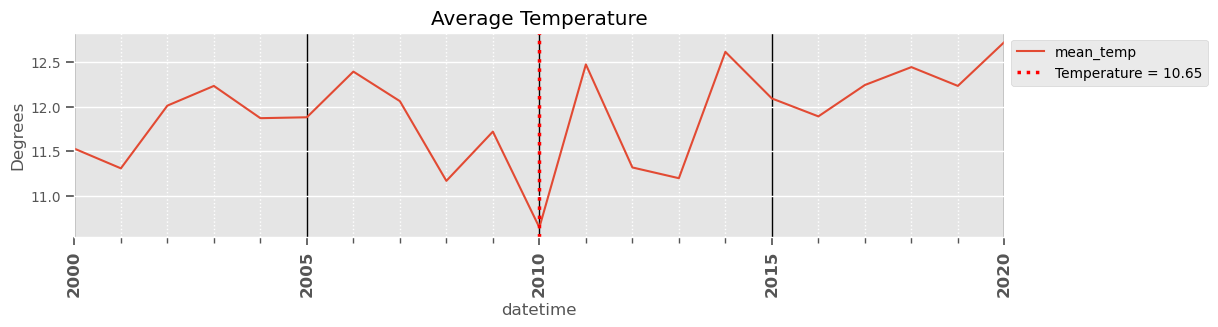

In [33]:
# move legend to outside of plot on right side
fig, ax = plt.subplots(figsize=(12,3))
ax.set_title('Average Temperature')

ts_2020.plot(style='-')


## Change the font of the major ticks to stand out
ax.set_xticks(ax.get_xticks())
ax.set_xticklabels(ax.get_xticklabels(), 
                   fontsize='large', 
                   fontweight='bold') 


## Making major/minor gridlines visually distinct
ax.grid(which='minor',axis='x',ls=":")
ax.grid(which='major',axis='x',color='k')

## rotate the dates
fig.autofmt_xdate(which='major',rotation=90,ha='center')

ax.axvline(date2, color='red',lw=2.5, ls=':', label=f'Temperature = {mean_temp2}')

plt.ylabel('Degrees')

ax.legend(bbox_to_anchor=[1,1]);